[Source](https://github.com/openai/openai-cookbook/blob/main/apps/web-crawl-q-and-a/web-qa.ipynb)

In [1]:
!pip install openai
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.2/798.2 kB 5.9 MB/s eta 0:00:0000:0100:01


In [8]:
openai.api_key = ""

In [1]:
import pandas as pd
import sqlite3
import openai
import tiktoken

# Connect to the database
conn = sqlite3.connect('arXiv.db')

# Query all values from the papers table
query = 'SELECT * FROM articles'
cursor = conn.cursor()
cursor.execute(query)
data = cursor.fetchall()

# Get the column names from the cursor's description
column_names = [desc[0] for desc in cursor.description]

# Create a DataFrame from the queried data
df = pd.DataFrame(data, columns=column_names)

# Close the connection
conn.close()

# Print the DataFrame
df

,id,title,abstract,doi
0,1,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,10.1103/PhysRevD.76.013009
1,2,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,10.1103/PhysRevA.75.043613
2,3,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,10.1103/PhysRevD.76.044016
3,4,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,10.1063/1.2975338
4,5,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,10.1086/518646
...,...,...,...,...
1125138,1125139,On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,10.1103/PhysRevB.54.15530
1125139,1125140,Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,10.1109/77.620744
1125140,1125141,Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,10.1103/PhysRevB.56.11989
1125141,1125142,Density of States and NMR Relaxation Rate in A...,We show that the density of states in an ani...,10.1143/JPSJ.65.3131


<AxesSubplot:>

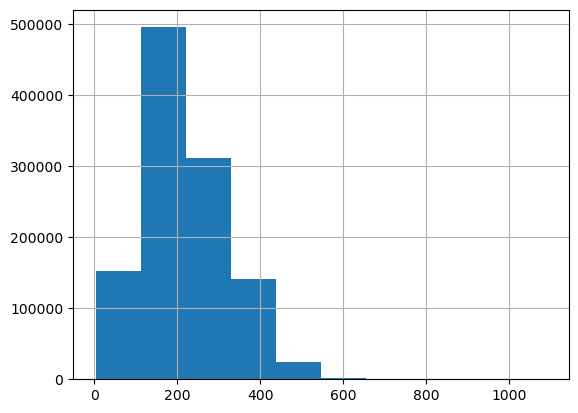

In [6]:
df['n_abstract_tokens'] = df.abstract.apply(lambda x: len(tokenizer.encode(x)))

df.n_abstract_tokens.hist()

<AxesSubplot:>

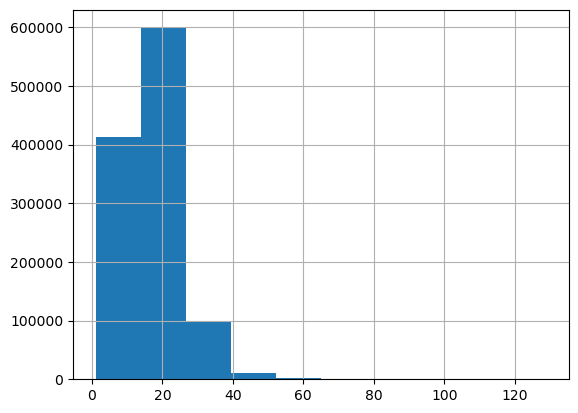

In [4]:
# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

# Tokenize the text and save the number of tokens to a new column
df['n_title_tokens'] = df.title.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_title_tokens.hist()

In [9]:
df['title_embeddings'] = df.title.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

APIError: The server had an error while processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 8924b45f22a43cfbaf8ec075ed6fa965 in your message.) {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 8924b45f22a43cfbaf8ec075ed6fa965 in your message.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 8924b45f22a43cfbaf8ec075ed6fa965 in your message.)', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Sun, 03 Sep 2023 00:59:32 GMT', 'Content-Type': 'application/json', 'Content-Length': '366', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-organization': 'user-08nrdcvaq5ywtimds30mt9lb', 'openai-processing-ms': '30011', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '3000', 'x-ratelimit-limit-tokens': '1000000', 'x-ratelimit-remaining-requests': '2999', 'x-ratelimit-remaining-tokens': '999980', 'x-ratelimit-reset-requests': '20ms', 'x-ratelimit-reset-tokens': '1ms', 'x-request-id': '8924b45f22a43cfbaf8ec075ed6fa965', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '800a0c3c6c2a2b99-LAX', 'alt-svc': 'h3=":443"; ma=86400'}

In [10]:
df

,id,title,abstract,doi,n_title_tokens,n_abstract_tokens
0,1,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,10.1103/PhysRevD.76.013009,20,225
1,2,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,10.1103/PhysRevA.75.043613,10,199
2,3,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,10.1103/PhysRevD.76.044016,9,198
3,4,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,10.1063/1.2975338,14,175
4,5,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,10.1086/518646,37,395
...,...,...,...,...,...,...
1125138,1125139,On the origin of the irreversibility line in t...,We report on measurements of the angular dep...,10.1103/PhysRevB.54.15530,25,128
1125139,1125140,Nonlinear Response of HTSC Thin Film Microwave...,The non-linear microwave surface impedance o...,10.1109/77.620744,20,125
1125140,1125141,Critical State Flux Penetration and Linear Mic...,The vortex contribution to the dc field (H) ...,10.1103/PhysRevB.56.11989,27,272
1125141,1125142,Density of States and NMR Relaxation Rate in A...,We show that the density of states in an ani...,10.1143/JPSJ.65.3131,24,152


In [13]:
# Get the total number of titles
total_titles = len(df)

# Set the batch size
batch_size = 200

MODEL = "text-embedding-ada-002"

# Initialize a list to store the embeddings
all_embeddings = []

# Process titles in batches
for start_idx in range(0, total_titles, batch_size):
    end_idx = min(start_idx + batch_size, total_titles)
    lines_batch = df['title'][start_idx:end_idx].tolist()
    ids_batch = [str(n) for n in range(start_idx, end_idx)]

    # Create embeddings using OpenAI
    res = openai.Embedding.create(input=lines_batch, engine=MODEL)
    embeds = [record['embedding'] for record in res['data']]
    all_embeddings.extend(embeds)

# Update the DataFrame with the embeddings
df['title_embeddings'] = all_embeddings

In [14]:
df.to_csv('article-title-embeddings.csv')

In [18]:
len(df.iloc[0]['title_embeddings'])

1536

In [1]:
import dask.dataframe as dd
df = dd.read_csv('article-title-embeddings.csv')
df.head()

,Unnamed: 0,id,title,abstract,doi,n_title_tokens,n_abstract_tokens,title_embeddings
0,0,1,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,10.1103/PhysRevD.76.013009,20,225,"[-0.025755716487765312, 0.00828852504491806, -..."
1,1,2,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,10.1103/PhysRevA.75.043613,10,199,"[-0.026890195906162262, -0.002863180823624134,..."
2,2,3,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,10.1103/PhysRevD.76.044016,9,198,"[-0.01248154602944851, -0.009046702645719051, ..."
3,3,4,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,10.1063/1.2975338,14,175,"[0.002483550924807787, 0.010482297278940678, 0..."
4,4,5,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,10.1086/518646,37,395,"[0.002993758535012603, 0.021343737840652466, -..."


In [5]:
import dask.dataframe as dd
import ast

# Define a function to apply literal_eval to each element in the column
def literal_eval_column(series):
    return series.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x, meta=('title_embeddings', 'object'))
    
# Use the map function to apply the custom function to the column
df['title_embeddings'] = df['title_embeddings'].map(literal_eval_column)

# Compute the result if needed
df.size.compute()

ValueError: Metadata inference failed in `map`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
AttributeError("'str' object has no attribute 'map'")

Traceback:
---------
  File "/Users/nickmccarty/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/utils.py", line 182, in raise_on_meta_error
    yield
  File "/Users/nickmccarty/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/core.py", line 6406, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/Users/nickmccarty/opt/anaconda3/lib/python3.9/site-packages/dask/utils.py", line 1070, in __call__
    return getattr(__obj, self.method)(*args, **kwargs)
  File "/Users/nickmccarty/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py", line 4237, in map
    new_values = self._map_values(arg, na_action=na_action)
  File "/Users/nickmccarty/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py", line 880, in _map_values
    new_values = map_f(values, mapper)
  File "pandas/_libs/lib.pyx", line 2870, in pandas._libs.lib.map_infer
  File "/var/folders/5t/3wsbxj9j6s54f2q6y4ydf2kr0000gn/T/ipykernel_20559/1737649098.py", line 6, in literal_eval_column
    return series.map(lambda x: ast.literal_eval(x) if isinstance(x, str) else x, meta=('title_embeddings', 'object'))
